In [3]:
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dirname = '/content/drive/My Drive/crop_data.csv'

In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('/content/drive/My Drive/crop_data.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [19]:
df =pd.DataFrame(data=data)
print(df)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


(array([164.,  38.,  28.,  87., 175., 250., 178., 385., 508., 387.]),
 array([14.25803981, 22.83042343, 31.40280705, 39.97519067, 48.54757429,
        57.11995791, 65.69234153, 74.26472515, 82.83710877, 91.40949239,
        99.98187601]),
 <a list of 10 Patch objects>)

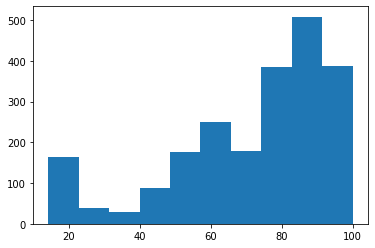

In [20]:
plt.hist(df['humidity'])

In [12]:

##Show first 7 rows
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
## Head shows first 20 rows
data.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [16]:
# tail shows last 5 rows
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [21]:
#info() method is used to prints information about the DataFrame such as  number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [22]:
#function to check duplicate data in data set
data.duplicated().sum()


0

In [ ]:
#To return description of the data in the DataFrame 
data.describe(include='all')

In [27]:
#replace zeros with NaN

data[['N','P','K','temperature','humidity','ph','rainfall','label']] = data[['N','P','K','temperature','humidity','ph','rainfall','label']].replace(0,np.NaN)
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [28]:
data.isnull().sum()

N              27
P               0
K               0
temperature     0
humidity        0
ph              0
rainfall        0
label           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2534536f90>,
      dtype=object)

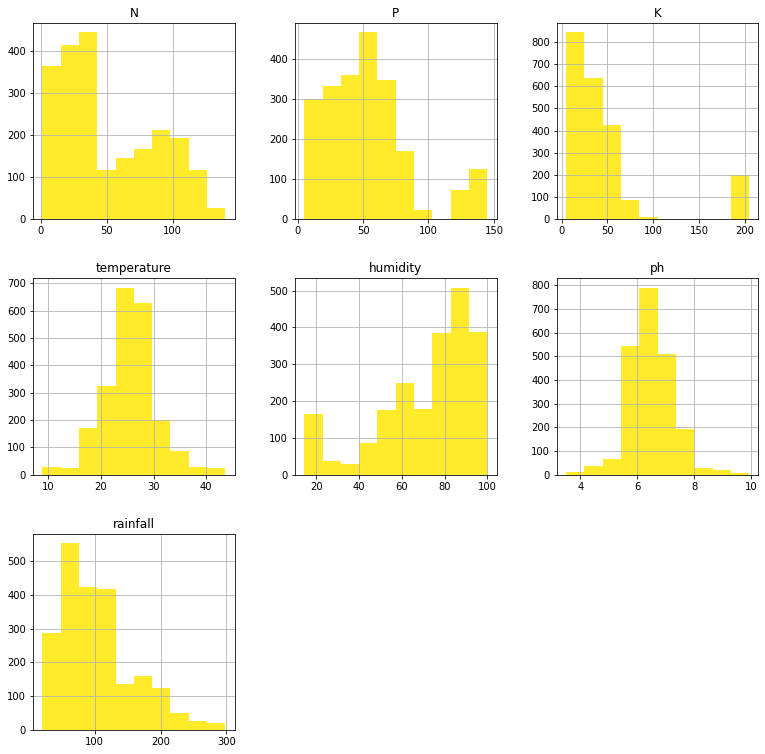

In [34]:
# Fill the zeros with Nan values
data.hist(figsize = (13,13), color="#FFEB2A")

In [37]:
# replace NaN values for the columns in accordance with their distribution
data['N'].fillna(data['N'].mean(), inplace = True)
data['P'].fillna(data['P'].mean(), inplace = True)
data['K'].fillna(data['K'].median(), inplace = True)
data['temperature'].fillna(data['temperature'].median(), inplace = True)
data['humidity'].fillna(data['humidity'].median(), inplace = True)
data['ph'].fillna(data['ph'].median(), inplace = True)
data['rainfall'].fillna(data['rainfall'].median(), inplace = True)
#data['label'].fillna(data['label'].median(), inplace = True)

In [38]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [40]:
#corr() is used to find the pairwise correlation of all columns in the dataframe.
#Any NAN values are automatically excluded. 
#For any non-numeric data type columns in the dataframe it is ignored. 
#Note: The correlation of a variable with itself is 1.
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.234975,-0.141285,0.029211,0.195526,0.093538,0.060237
P,-0.234975,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.141285,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.029211,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.195526,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.093538,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.060237,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [42]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [43]:
data.shape

(2200, 8)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   float64
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 137.6+ KB


In [45]:
data['temperature'].value_counts()

20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: temperature, Length: 2200, dtype: int64

In [46]:
#The dtypes property is used to find the dtypes in the DataFrame.

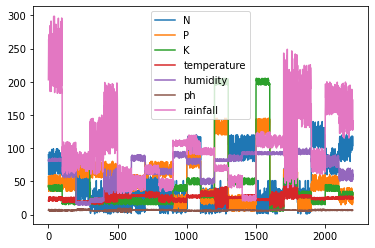

In [47]:
data1 = data.loc[:,["N", "P", "K", "temperature", "humidity", "ph", "rainfall", "label"]]
data1.plot()

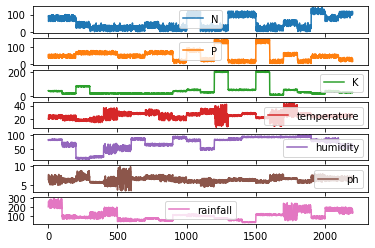

In [48]:
# subplots
data1.plot(subplots = True)
plt.show()

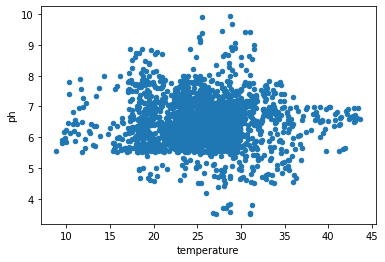

In [49]:
# scatter plot: A scatter plot is a diagram where each value in the data set is represented by a dot. 
data.plot(kind = "scatter",x="temperature",y = "ph")
plt.show()

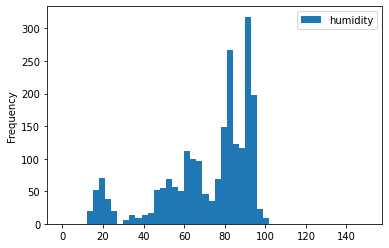

In [51]:
# hist plot 
data1.plot(kind = "hist",y = "humidity",bins = 50,range= (0,150))

In [52]:
# a missing value is denoted by NaN
data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [55]:
#to get the number of missing data points per column
missing_values_count = data.isnull().sum()

In [56]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [59]:
# Features Selection
# iloc() function enables us to select a particular cell of the dataset.
# it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [60]:
# feature selection
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
x = data[feature_cols]
y = data.humidity

In [61]:
# remove all the rows that contain a missing value
data.dropna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [62]:
# remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [63]:
from sklearn.model_selection import train_test_split
x = data.drop(['label'],axis=1)
y = data['label']

In [65]:
from re import X
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled = sc.fit_transform(x)

In [68]:
#split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)
x_train.shape, y_train.shape

((1980, 7), (1980,))

In [69]:
x_test.shape, y_test.shape

((220, 7), (220,))

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 8,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_f.fit(x_train, y_train)
y_pred = random_f.predict(x_test)
print(y_pred)

['grapes' 'muskmelon' 'kidneybeans' 'muskmelon' 'jute' 'watermelon'
 'kidneybeans' 'orange' 'jute' 'pigeonpeas' 'pomegranate' 'jute' 'coffee'
 'mango' 'mothbeans' 'banana' 'banana' 'coconut' 'banana' 'orange'
 'lentil' 'apple' 'pomegranate' 'papaya' 'muskmelon' 'banana' 'grapes'
 'coconut' 'cotton' 'watermelon' 'maize' 'maize' 'muskmelon' 'apple'
 'mothbeans' 'cotton' 'mango' 'blackgram' 'mungbean' 'orange' 'pigeonpeas'
 'grapes' 'orange' 'papaya' 'coconut' 'pomegranate' 'papaya' 'coffee'
 'chickpea' 'jute' 'chickpea' 'maize' 'lentil' 'pomegranate' 'coffee'
 'mungbean' 'watermelon' 'watermelon' 'cotton' 'mango' 'blackgram'
 'mungbean' 'pomegranate' 'banana' 'coffee' 'muskmelon' 'chickpea'
 'grapes' 'apple' 'jute' 'grapes' 'mango' 'orange' 'maize' 'rice'
 'watermelon' 'watermelon' 'maize' 'cotton' 'mango' 'chickpea' 'banana'
 'apple' 'orange' 'cotton' 'blackgram' 'cotton' 'mango' 'mothbeans'
 'pomegranate' 'jute' 'pigeonpeas' 'grapes' 'watermelon' 'mungbean'
 'mungbean' 'kidneybeans' 'c

In [ ]:
# Confusion Matrix
#TP (True Positive)
#FP (False Positive)
#TN (True Negative)
#FN (False Negative)
#True Positive: Actually positive (ground truth), predicted as positive (correctly classified)
#True Negative: Actually negative (ground truth), predicted as negative (correctly classified)
#False Positive: Actually negative (ground truth), predicted as positive (misclassified)
#False Negative: Actually positive (ground truth), predicted as negative (misclassified)

In [72]:
 #Confusin Matrix
from sklearn.metrics import confusion_matrix
 confmat1 = confusion_matrix(y_pred, y_test)
 confmat1

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,

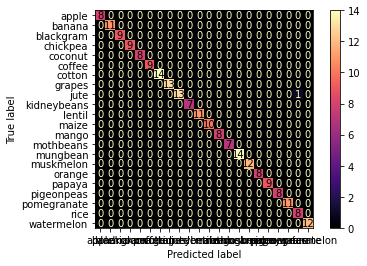

In [78]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=random_f.classes_),
                              display_labels=random_f.classes_)
cm.plot(cmap="magma")

In [77]:
cm.plot?

In [87]:
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# accuracy
print("➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [89]:
import numpy as np
from sklearn.metrics import f1_score

In [93]:
actual = np.repeat([1, 0], repeats=[99,55])
actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [94]:
pred = np.repeat([1, 0, 1, 0], repeats=[86, 13, 20, 35])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [96]:
f1_score(actual, pred)

0.8390243902439025

In [ ]:
#Precision can be defined with respect to either of the classes. The precision of negative class is intuitively the ability of the classifier not to label as positive a sample that is negative. The precision of positive class is intuitively the ability of the classifier not to label as negative a sample that is positive. The best value of precision is 1 and the worst value is 0.
precision_positive = metrics.precision_score(y_test, pred, pos_label=1)
precision_negative = metrics.precision_score(y_test, pred, pos_label=0)
precision_positive, precision_negative 